# Model Training Notebook

In [1]:
%matplotlib inline
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from datetime import datetime
from IPython.core.display import display, HTML
import cv2
from PIL import Image
from pathlib import Path
import torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F
import ast

from sklearn.model_selection import train_test_split

# repeatable functions housed in the utils file and imported here
from utils import *
from model_training_utils import train as training_loop
from model_training_utils import validate as validation_loop
from model_training_utils import hp_grid_search
from models import CNN

## Create Training and Validation Datasets

In [2]:
df= pd.read_csv('./datasets/annotations_map.csv', converters={'new_bb': from_np_array})

In [3]:
df_train = df.reset_index()
X = df_train[['new_path','new_bb']]
Y = df_train['class']
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.25, random_state=42)
print('Number of training observations: ', X_train.shape[0])
print('Number of validation observations: ', X_val.shape[0])

Number of training observations:  32
Number of validation observations:  11


## Build RCNN

## Build YOLO

# Train the Model


- Structured similarly to main.py file from pytorch part of A2

In [4]:
## Define Hyperparameters -- Currently setting values that we can modify
loss_type = "l1"
learning_rate = 0.001
momentum = 0.5
reg = 1e-2

training_batch_size= 5
validation_batch_size= 5

model= "SimpleCNN"

In [5]:
if loss_type == "l1":
    criterion = nn.L1Loss()
    
if loss_type == "l2":
    criterion = nn.MSELoss()
    
if model== "SimpleCNN":
    model= CNN()
    
train_ds = WaldoDataset(X_train['new_path'],X_train['new_bb'] ,y_train)
valid_ds = WaldoDataset(X_val['new_path'],X_val['new_bb'],y_val)

train_dl = DataLoader(train_ds, batch_size=training_batch_size, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=validation_batch_size)

optimizer = torch.optim.SGD(model.parameters(), learning_rate,
                            momentum=momentum,
                            weight_decay=reg)

In [6]:
# training_loop(model= model, optimizer= optimizer, train_dl= train_dl, valid_dl=valid_dl, epochs= 20, criterion= criterion, verbose= True, return_loss= False)

HP ITERATION:  0
learning_rate:  0.001
regularization:  0.01
momentum:  0.9
batch_size:  10
loss type:  l1
SimpleCNN_0.001_0.01_0.9_10


/Users/andrew.lofgreen/Documents/OMSCS/cs7643/dl7643/CS7643-Final-Project/model_training_utils.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_bb = torch.tensor(y_bb)


 
--------------------------------------------------------
Training Loss for Epoch 0: 932.4906921386719


/Users/andrew.lofgreen/Documents/OMSCS/cs7643/dl7643/CS7643-Final-Project/model_training_utils.py:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_bb= torch.tensor(y_bb)


Validation Loss for Epoch 0: 382.31105041503906
 
--------------------------------------------------------
Training Loss for Epoch 1: 871.2300109863281
Validation Loss for Epoch 1: 363.9168395996094
 
--------------------------------------------------------
Training Loss for Epoch 2: 765.1803283691406
Validation Loss for Epoch 2: 221.35086822509766
 
--------------------------------------------------------
Training Loss for Epoch 3: 513.3379516601562
Validation Loss for Epoch 3: 515.1151733398438
 
--------------------------------------------------------
Training Loss for Epoch 4: 649.2796630859375
Validation Loss for Epoch 4: 279.3129119873047
 
--------------------------------------------------------
Training Loss for Epoch 5: 629.8195648193359
Validation Loss for Epoch 5: 194.97008895874023
 
--------------------------------------------------------
Training Loss for Epoch 6: 620.7568511962891
Validation Loss for Epoch 6: 253.01073455810547
 
-----------------------------------------

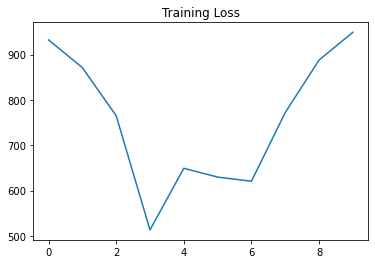

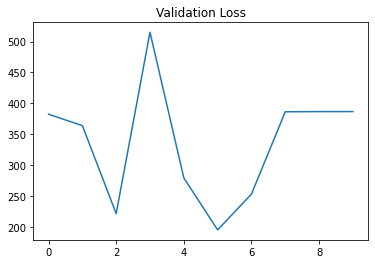

./figures/V_SimpleCNN_0.001_0.01_0.9_10.png


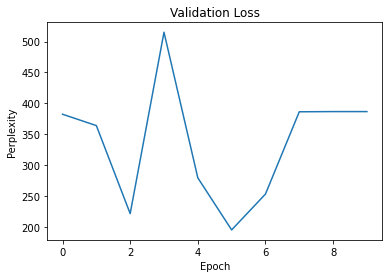

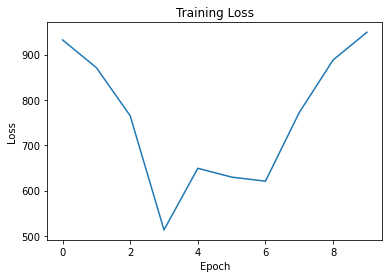

HP ITERATION:  1
learning_rate:  0.0001
regularization:  0.01
momentum:  0.9
batch_size:  10
loss type:  l1
SimpleCNN_0.0001_0.01_0.9_10
 
--------------------------------------------------------
Training Loss for Epoch 0: 859.0179901123047
Validation Loss for Epoch 0: 386.27593994140625
 
--------------------------------------------------------
Training Loss for Epoch 1: 772.2654190063477
Validation Loss for Epoch 1: 385.4467010498047
 
--------------------------------------------------------
Training Loss for Epoch 2: 825.1200256347656
Validation Loss for Epoch 2: 384.2837829589844
 
--------------------------------------------------------
Training Loss for Epoch 3: 992.6513366699219
Validation Loss for Epoch 3: 382.7854461669922
 
--------------------------------------------------------
Training Loss for Epoch 4: 920.0243072509766
Validation Loss for Epoch 4: 380.8340148925781
 
--------------------------------------------------------
Training Loss for Epoch 5: 817.5670776367188
Val

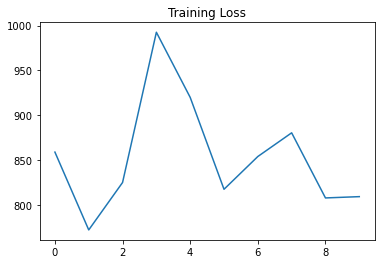

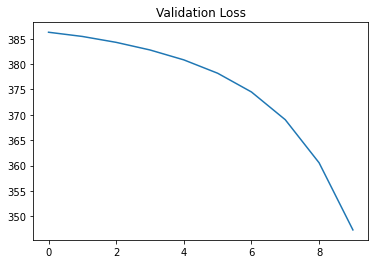

./figures/V_SimpleCNN_0.0001_0.01_0.9_10.png


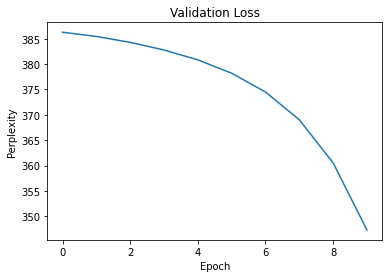

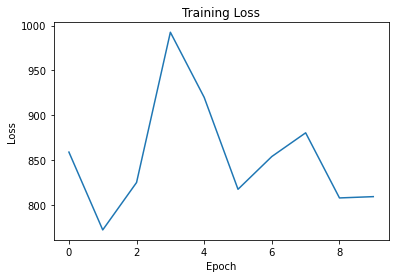

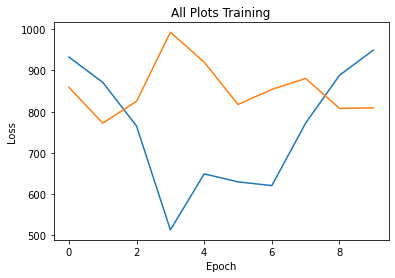

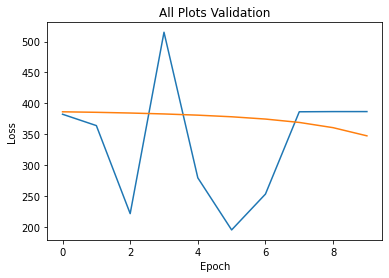

In [7]:
loss_type= ["l1"]
learning_rate= [0.001,0.0001]
momentum = [0.9]
reg = [0.01]
batch_size= [10]

all_training_loss, all_validation_loss= hp_grid_search(model_type= "SimpleCNN", 
               lr_list=learning_rate, 
               momentum_list=momentum, 
               reg_list=reg, 
               batch_size_list=batch_size,
               train_ds= train_ds,
               valid_ds= valid_ds,
               optimizer= optimizer, 
               loss_type_list=loss_type,
               epochs= 10,
               save_all_plots="Yes", 
               save_final_plot="Yes",
               final_plot_prefix="Test", 
               return_all_loss= True)